In [1]:
%run func_def.ipynb

**imports loaded.

> File management func:
    get_content(directory)

> Pre-Processing func:
    get_striking_efficiency(name, date)
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_prob(name, date, df)
    get_win_streak(name, date, df) #return count of recent wins
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )

> Feature Engineering func:
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data) # return fighter & opponent statistics swapped. 
    get_wins(combo, data)
    get_wins_ratio(combo, data)

> outlier_cleaning func:
    set_outlier_detection_model(X_columns, data)

> model_stats_pred_training func:
    set_lower_cases(string)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_xgboost_reg(X_columns, y_columns, data, n=200, learning_rate=0.2, subsample=0.4, max_dept

### <span style='color:green'> **[done]** </span>Loading Feature's-ready data

In [2]:
loc = '../data/'
file = 'data_features_outliers_detected.csv'
data = pd.read_csv(loc+file)
data.tail(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,str_efc_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier
6391,lose,Jamie Mullarkey,Muhammad Naimov,2023-06-03,Lightweight,KO/TKO,Punch,-1.341659,0.384238,1.182042,-0.008752,1.633408,0.864923,0.2,0.437681,0.473642,-0.833962,0.849897,0.00651,0.232252,1.412053,1.122819,-0.018188,False,False
6392,win,Elise Reed,Jinh Yu Frey,2023-06-03,Women's Strawweight,U-DEC,Unanimous,0.004210,0.899464,-1.175651,-0.008752,-0.199954,-1.345974,-0.3,-0.013941,0.638938,-0.606841,0.066464,0.00758,-1.880897,0.248877,0.009144,-0.018188,False,False
6393,lose,Luan Lacerda,Da'Mon Blackshear,2023-06-03,Bantamweight,KO/TKO,Punches,0.004210,-1.419052,0.003196,0.852188,0.057950,0.726742,-0.2,0.581949,0.060402,2.049208,-0.368777,0.00000,-1.259599,0.001393,0.009144,-0.018188,False,False


#### <span style='color:green'> **[done]** </span>X & Y definitions:

In [3]:
req_data = ['date','fighter','opponent','weight_class','result','method','outlier','lof_outlier']
y = ['kd_dif','str_dif','td_dif','sub_dif']
X = []

for column in data.columns:
    if ('_dif' in column and column not in y) or 'ratio' in column:
        X.append(column)

data = data[req_data + y + X]
print('X: %s' %X)
print('y: %s' %y)
data.head(3)

X: ['td_avg_dif', 'td_def_dif', 'sub_avg_dif', 'slpm_dif', 'str_acc_dif', 'sapm_dif', 'str_def_dif', 'str_efc_dif', 'stance_win_ratio', 'win_perc_dif', 'win_strk_dif', 'lose_strk_dif']
y: ['kd_dif', 'str_dif', 'td_dif', 'sub_dif']


,date,fighter,opponent,weight_class,result,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,str_efc_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
0,2023-04-15,Max Holloway,Arnold Allen,Featherweight,win,U-DEC,True,True,0.004210,2.592349,0.003196,-0.008752,-0.469071,0.277653,0.0,2.382163,0.556290,1.222742,-0.194681,-0.00454,-1.880897,-0.666814,-5.559232,1.001957
1,2023-04-15,Edson Barboza,Billy Quarantillo,Featherweight,win,KO/TKO,False,False,1.350079,0.053021,0.003196,-0.008752,-0.631663,0.588561,-1.1,-2.435135,-1.179316,-1.048464,1.546283,0.00814,0.232252,-0.295587,-0.547693,2.022101
2,2023-04-15,Azamat Murzakanov,Dustin Jacoby,Light Heavyweight,win,U-DEC,False,False,1.350079,0.089823,0.003196,-0.008752,0.198116,0.795832,0.0,-0.559651,0.804233,-0.568988,-0.107633,0.00399,1.159339,0.496362,0.565982,-1.038333


#### <span style='color:green'> **[done]** </span>Drop Outliers:

In [4]:
data = data[(data.outlier == False)&(data.lof_outlier == False)].reset_index(drop=True)
data.tail(3)

,date,fighter,opponent,weight_class,result,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,str_efc_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
5218,2023-06-03,Jamie Mullarkey,Muhammad Naimov,Lightweight,lose,KO/TKO,False,False,-1.341659,0.384238,1.182042,-0.008752,1.633408,0.864923,0.2,0.437681,0.473642,-0.833962,0.849897,0.00651,0.232252,1.412053,1.122819,-0.018188
5219,2023-06-03,Elise Reed,Jinh Yu Frey,Women's Strawweight,win,U-DEC,False,False,0.004210,0.899464,-1.175651,-0.008752,-0.199954,-1.345974,-0.3,-0.013941,0.638938,-0.606841,0.066464,0.00758,-1.880897,0.248877,0.009144,-0.018188
5220,2023-06-03,Luan Lacerda,Da'Mon Blackshear,Bantamweight,lose,KO/TKO,False,False,0.004210,-1.419052,0.003196,0.852188,0.057950,0.726742,-0.2,0.581949,0.060402,2.049208,-0.368777,0.00000,-1.259599,0.001393,0.009144,-0.018188


#### <span style='color:green'> **[done]** </span>Filter by weight-class: Creating seperate models for each class

In [5]:
weight = "General"
weight_classes = {'General','Flyweight','Bantamweight','Featherweight',
                  'Lightweight','Welterweight','Middleweight',
                  'Light Heavyweight','Heavyweight','Super Heavyweight','Open Weight',
                  "Women's Strawweight","Women's Flyweight","Women's Bantamweight",
                  "Women's Featherweight"}

if weight != 'General':
    data = data[data['weight_class']==weight].reset_index(drop=True)
    
data.tail(3)

,date,fighter,opponent,weight_class,result,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,str_efc_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
5218,2023-06-03,Jamie Mullarkey,Muhammad Naimov,Lightweight,lose,KO/TKO,False,False,-1.341659,0.384238,1.182042,-0.008752,1.633408,0.864923,0.2,0.437681,0.473642,-0.833962,0.849897,0.00651,0.232252,1.412053,1.122819,-0.018188
5219,2023-06-03,Elise Reed,Jinh Yu Frey,Women's Strawweight,win,U-DEC,False,False,0.004210,0.899464,-1.175651,-0.008752,-0.199954,-1.345974,-0.3,-0.013941,0.638938,-0.606841,0.066464,0.00758,-1.880897,0.248877,0.009144,-0.018188
5220,2023-06-03,Luan Lacerda,Da'Mon Blackshear,Bantamweight,lose,KO/TKO,False,False,0.004210,-1.419052,0.003196,0.852188,0.057950,0.726742,-0.2,0.581949,0.060402,2.049208,-0.368777,0.00000,-1.259599,0.001393,0.009144,-0.018188


#### <span style='color:green'> **[done]** </span>Train/test/validation assigment:

In [6]:
data = set_train_test(X_columns=X, y_columns=y, data=data, test_size=0.15, valid_size=0.05)
data.tail(3)

Data split: Data=(5221, 25), train_set=(4222, 12), validation_set=(210, 12), test_set=(789, 12)


,set,date,fighter,opponent,weight_class,result,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,str_efc_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
5218,train,2023-06-03,Jamie Mullarkey,Muhammad Naimov,Lightweight,lose,KO/TKO,False,False,-1.341659,0.384238,1.182042,-0.008752,1.633408,0.864923,0.2,0.437681,0.473642,-0.833962,0.849897,0.00651,0.232252,1.412053,1.122819,-0.018188
5219,train,2023-06-03,Elise Reed,Jinh Yu Frey,Women's Strawweight,win,U-DEC,False,False,0.004210,0.899464,-1.175651,-0.008752,-0.199954,-1.345974,-0.3,-0.013941,0.638938,-0.606841,0.066464,0.00758,-1.880897,0.248877,0.009144,-0.018188
5220,train,2023-06-03,Luan Lacerda,Da'Mon Blackshear,Bantamweight,lose,KO/TKO,False,False,0.004210,-1.419052,0.003196,0.852188,0.057950,0.726742,-0.2,0.581949,0.060402,2.049208,-0.368777,0.00000,-1.259599,0.001393,0.009144,-0.018188


## <span style='color:green'> **[done]** </span> XGBoost regressor model training:

In [7]:
xgboost_reg = set_xgboost_reg(X_columns=X, y_columns=y, data=data, n=200, learning_rate=0.2, subsample=0.4, max_depth=5)
df = set_predictions(model=xgboost_reg, X_columns=X, y_columns=y, data=data)
df.tail(3)

,set,date,fighter,opponent,weight_class,result,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,str_efc_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
5218,train,2023-06-03,Jamie Mullarkey,Muhammad Naimov,Lightweight,lose,KO/TKO,False,False,-1.341659,0.384238,1.182042,-0.008752,1.633408,0.864923,0.2,0.437681,0.473642,-0.833962,0.849897,0.00651,0.232252,1.412053,1.122819,-0.018188,-0.603025,-0.603025,-0.603025,-0.603025
5219,train,2023-06-03,Elise Reed,Jinh Yu Frey,Women's Strawweight,win,U-DEC,False,False,0.004210,0.899464,-1.175651,-0.008752,-0.199954,-1.345974,-0.3,-0.013941,0.638938,-0.606841,0.066464,0.00758,-1.880897,0.248877,0.009144,-0.018188,0.368805,0.368805,0.368805,0.368805
5220,train,2023-06-03,Luan Lacerda,Da'Mon Blackshear,Bantamweight,lose,KO/TKO,False,False,0.004210,-1.419052,0.003196,0.852188,0.057950,0.726742,-0.2,0.581949,0.060402,2.049208,-0.368777,0.00000,-1.259599,0.001393,0.009144,-0.018188,-0.357959,-0.357959,-0.357959,-0.357959


### <span style='color:green'> **[done]** </span>GridSearch (=Parameter tuning):

In [8]:
grid = {'learning_rate': [0.3,0.2,0.1,0.05,0.01],
        'subsample': [0.5,0.6,0.7,0.8,0.9],
        'n_estimators':[50,100,200,300,400],
        'kd_dif_train_error':[None,None,None,None,None],
        'str_dif_train_error':[None,None,None,None,None],
        'td_dif_train_error':[None,None,None,None,None],
        'sub_dif_train_error':[None,None,None,None,None],
        'kd_dif_valid_error':[None,None,None,None,None],
        'str_dif_valid_error':[None,None,None,None,None],
        'td_dif_valid_error':[None,None,None,None,None],
        'sub_dif_valid_error':[None,None,None,None,None],
        'train_error':[None,None,None,None,None],
        'valid_error':[None,None,None,None,None]
        }

grid = pd.DataFrame(data=grid)
grid

,learning_rate,subsample,n_estimators,kd_dif_train_error,str_dif_train_error,td_dif_train_error,sub_dif_train_error,kd_dif_valid_error,str_dif_valid_error,td_dif_valid_error,sub_dif_valid_error,train_error,valid_error
0,0.30,0.5,50,None,None,None,None,None,None,None,None,None,None
1,0.20,0.6,100,None,None,None,None,None,None,None,None,None,None
2,0.10,0.7,200,None,None,None,None,None,None,None,None,None,None
3,0.05,0.8,300,None,None,None,None,None,None,None,None,None,None
4,0.01,0.9,400,None,None,None,None,None,None,None,None,None,None


In [9]:
train_index = df.index[df.set=='train']
valid_index = df.index[df.set=='validation']

i = 0
for learning_rate in tqdm(grid['learning_rate']):
    for subsample in grid['subsample']:
        for n_estimators in grid['n_estimators']:
            
            xgboost_reg = set_xgboost_reg(X_columns=X, y_columns=y, data=df, n=n_estimators, learning_rate=learning_rate, subsample=subsample, max_depth=5)
            df = set_predictions(model=xgboost_reg, X_columns=X, y_columns=y, data=df)
            
            for stat in ['kd_dif','str_dif','td_dif','sub_dif']:
                grid.loc[i,stat + '_train_error'] = get_mean_percentage_error(act=df.loc[train_index,stat],pred=df.loc[train_index, stat + '_pred'])
                grid.loc[i,stat + '_valid_error'] = get_mean_percentage_error(act=df.loc[valid_index,stat],pred=df.loc[valid_index,stat + '_pred'])
                
    i += 1  
    
grid['train_error'] = 0.25*(grid['kd_dif_train_error'] + grid['str_dif_train_error'] + grid['td_dif_train_error'] + grid['sub_dif_train_error'])
grid['valid_error'] = 0.25*(grid['kd_dif_valid_error'] + grid['str_dif_valid_error'] + grid['td_dif_valid_error'] + grid['sub_dif_valid_error'])
grid = grid[['learning_rate','subsample','n_estimators','train_error','valid_error']]
grid

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:48<00:00, 45.66s/it]


,learning_rate,subsample,n_estimators,train_error,valid_error
0,0.30,0.5,50,0.865381,0.853175
1,0.20,0.6,100,0.86754,0.858622
2,0.10,0.7,200,0.873282,0.8667
3,0.05,0.8,300,0.878962,0.869233
4,0.01,0.9,400,0.883724,0.877012


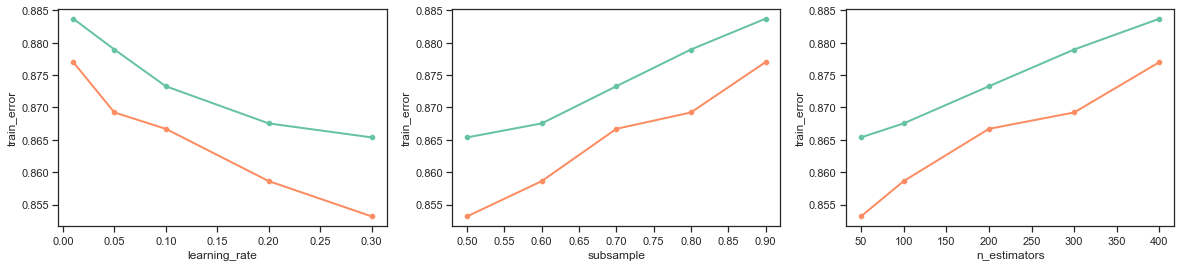

In [10]:
rows=1
cols=3
sns.set_palette("Set2")
fig, axs = plt.subplots(rows,cols,figsize = (20,4))
model_param = ['learning_rate','subsample','n_estimators']

for i in range(len(model_param)):
    sns.lineplot(ax=axs[i], data=grid, x=model_param[i], y='train_error')
    sns.scatterplot(ax=axs[i], data=grid, x=model_param[i], y='train_error')
    sns.lineplot(ax=axs[i], data=grid, x=model_param[i], y='valid_error')
    sns.scatterplot(ax=axs[i], data=grid, x=model_param[i], y='valid_error')

#### <span style='color:green'> **[done]** </span> Train model with chosen parameters:

In [11]:
grid[grid.valid_error == np.min(grid.valid_error)]

,learning_rate,subsample,n_estimators,train_error,valid_error
0,0.3,0.5,50,0.865381,0.853175


In [12]:
xgboost_reg = set_xgboost_reg(X_columns=X, y_columns=y, data=df, n=grid.loc[0,'n_estimators'], learning_rate=grid.loc[0,'learning_rate'], subsample=grid.loc[0,'subsample'], max_depth=len(X))
df = set_predictions(model=xgboost_reg, X_columns=X, y_columns=y, data=df)
df.tail(3)

,set,date,fighter,opponent,weight_class,result,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,str_efc_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
5218,train,2023-06-03,Jamie Mullarkey,Muhammad Naimov,Lightweight,lose,KO/TKO,False,False,-1.341659,0.384238,1.182042,-0.008752,1.633408,0.864923,0.2,0.437681,0.473642,-0.833962,0.849897,0.00651,0.232252,1.412053,1.122819,-0.018188,-1.164379,-1.164379,-1.164379,-1.164379
5219,train,2023-06-03,Elise Reed,Jinh Yu Frey,Women's Strawweight,win,U-DEC,False,False,0.004210,0.899464,-1.175651,-0.008752,-0.199954,-1.345974,-0.3,-0.013941,0.638938,-0.606841,0.066464,0.00758,-1.880897,0.248877,0.009144,-0.018188,0.039886,0.039886,0.039886,0.039886
5220,train,2023-06-03,Luan Lacerda,Da'Mon Blackshear,Bantamweight,lose,KO/TKO,False,False,0.004210,-1.419052,0.003196,0.852188,0.057950,0.726742,-0.2,0.581949,0.060402,2.049208,-0.368777,0.00000,-1.259599,0.001393,0.009144,-0.018188,-0.046717,-0.046717,-0.046717,-0.046717


#### <span style='color:green'> **[done]** </span> Add predictions to data:

In [13]:
#test
pred_columns = ['kd_dif_pred','str_dif_pred','td_dif_pred','sub_dif_pred']
pred = df[['date','fighter','opponent'] + pred_columns]
pred.head(3)

,date,fighter,opponent,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
0,2023-04-15,Edson Barboza,Billy Quarantillo,-1.073060,-1.073060,-1.073060,-1.073060
1,2023-04-15,Azamat Murzakanov,Dustin Jacoby,1.327334,1.327334,1.327334,1.327334
2,2023-04-15,Tanner Boser,Ion Cutelaba,-0.015620,-0.015620,-0.015620,-0.015620


In [14]:
data = pd.read_csv('../data/data_features_outliers_detected.csv')
data = pd.merge(data,pred, on=['date','fighter','opponent'], how='outer')

data.to_csv('../data/data_stats_prediction_set.csv', index=None)
print('../data/data_stats_prediction_set.csv saved.')
data.tail(3)

../data/data_stats_prediction_set.csv saved.


,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,str_efc_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
6391,lose,Jamie Mullarkey,Muhammad Naimov,2023-06-03,Lightweight,KO/TKO,Punch,-1.341659,0.384238,1.182042,-0.008752,1.633408,0.864923,0.2,0.437681,0.473642,-0.833962,0.849897,0.00651,0.232252,1.412053,1.122819,-0.018188,False,False,-1.164379,-1.164379,-1.164379,-1.164379
6392,win,Elise Reed,Jinh Yu Frey,2023-06-03,Women's Strawweight,U-DEC,Unanimous,0.004210,0.899464,-1.175651,-0.008752,-0.199954,-1.345974,-0.3,-0.013941,0.638938,-0.606841,0.066464,0.00758,-1.880897,0.248877,0.009144,-0.018188,False,False,0.039886,0.039886,0.039886,0.039886
6393,lose,Luan Lacerda,Da'Mon Blackshear,2023-06-03,Bantamweight,KO/TKO,Punches,0.004210,-1.419052,0.003196,0.852188,0.057950,0.726742,-0.2,0.581949,0.060402,2.049208,-0.368777,0.00000,-1.259599,0.001393,0.009144,-0.018188,False,False,-0.046717,-0.046717,-0.046717,-0.046717


#### <span style='color:green'> **[done]** </span> Saving model as pickle:

In [15]:
save_trained_model(model=xgboost_reg,filename_path='../global_variables/stats_pred_' + set_lower_cases(weight) + '_xgboost_reg.pkl')

../global_variables/stats_pred_general_xgboost_reg.pkl saved.
